In [1]:
import numpy as np
import pandas as pd
import sklearn
import keras
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from scipy.sparse import csr_matrix
from keras.layers import Dense,Dropout
from keras.layers.recurrent import LSTM
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split
import json

Using TensorFlow backend.
/home/tinex/newAnaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [50]:
phrases = pd.read_csv("./datasets/Emotion Phrases.csv",names=["emotion","text"])
phrases.head(7)

,emotion,text
0,joy,[ On days when I feel close to my partner and ...
1,fear,Every time I imagine that someone I love or I ...
2,anger,When I had been obviously unjustly treated and...
3,sadness,When I think about the short time that we live...
4,disgust,At a gathering I found myself involuntarily si...
5,shame,When I realized that I was directing the feeli...
6,guilt,I feel guilty when when I realize that I consi...


In [46]:
text = phrases.text
labels = phrases.emotion

(1094,)

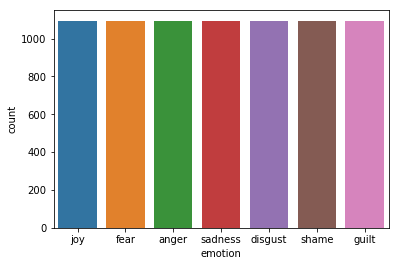

In [47]:
sns.countplot(labels)
labels[labels=="anger"].shape

In [6]:
count_vectorizer = CountVectorizer()

In [17]:
new_text = count_vectorizer.fit_transform(text)

In [21]:
new_text = csr_matrix.todense(new_text)

In [22]:
new_text.shape

(7652, 8973)

In [20]:
tfidf = TfidfVectorizer()
new_text = tfidf.fit_transform(text)

In [9]:
new_text.sum()

149963

In [48]:
labels = LabelEncoder().fit_transform(labels)
labels = labels.reshape(-1,1)
labels = OneHotEncoder().fit_transform(labels)

In [49]:
labels = csr_matrix.todense(labels)
labels[:7]

matrix([[ 0.,  0.,  0.,  0.,  1.,  0.,  0.],
        [ 0.,  0.,  1.,  0.,  0.,  0.,  0.],
        [ 1.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  1.,  0.],
        [ 0.,  1.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.,  0.,  0.,  0.]])

In [14]:
X_train,X_test,y_train,y_test = train_test_split(new_text,labels,test_size=0.3)

In [15]:
model = keras.Sequential()
model.add(Dense(256,activation="relu",input_dim=8973))
model.add(Dropout(0.5))
model.add(Dense(128,activation="relu",input_dim=256))
model.add(Dropout(0.5))
model.add(Dense(64,activation="relu",input_dim=128))
model.add(Dropout(0.5))
model.add(Dense(7,activation="softmax",input_dim=64))

In [24]:
sgd = keras.optimizers.SGD(lr=0.7)
model.compile(optimizer=sgd,loss="categorical_crossentropy",metrics=["accuracy"])
model.fit(X_train,y_train,batch_size=32,epochs=3)

Epoch 1/3
5356/5356 [==============================] - 18s 3ms/step - loss: 1.9263 - acc: 0.1811: 1s - loss: 1.9301
Epoch 2/3
5356/5356 [==============================] - 17s 3ms/step - loss: 1.8989 - acc: 0.2121: 1s - loss: 1.9044 -
Epoch 3/3
5356/5356 [==============================] - 17s 3ms/step - loss: 1.8982 - acc: 0.2086


In [33]:
count_vectorizer.tokenizer

set()

In [43]:
model.predict_classes(X_test[1,:])[0]

3

In [97]:
score = model.evaluate(X_test,y_test,batch_size=32)

2296/2296 [==============================] - 3s 1ms/step


In [98]:
score

[1.4213835640651424, 0.5396341465491451]

In [109]:
model.save_weights("model1_weights.hdf5")
config = model.get_config()
model.to_json()

'{"class_name": "Sequential", "config": [{"class_name": "Dense", "config": {"name": "dense_25", "trainable": true, "batch_input_shape": [null, 8973], "dtype": "float32", "units": 256, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "VarianceScaling", "config": {"scale": 1.0, "mode": "fan_avg", "distribution": "uniform", "seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dropout", "config": {"name": "dropout_19", "trainable": true, "rate": 0.5, "noise_shape": null, "seed": null}}, {"class_name": "Dense", "config": {"name": "dense_26", "trainable": true, "batch_input_shape": [null, 256], "dtype": "float32", "units": 128, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "VarianceScaling", "config": {"scale": 1.0, "mode": "fan_avg", "distribution": "uniform",

In [35]:
config = model.get_config()

In [37]:
json_config = json.JSONEncoder()
json_config = json_config.encode(config)

In [38]:
with open("config.json","w") as file:
    file.write(json_config)

In [130]:
with open("config.json","r") as file:
    print(file.read())

{"class_name": "Sequential", "config": [{"class_name": "Dense", "config": {"name": "dense_25", "trainable": true, "batch_input_shape": [null, 8973], "dtype": "float32", "units": 256, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "VarianceScaling", "config": {"scale": 1.0, "mode": "fan_avg", "distribution": "uniform", "seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dropout", "config": {"name": "dropout_19", "trainable": true, "rate": 0.5, "noise_shape": null, "seed": null}}, {"class_name": "Dense", "config": {"name": "dense_26", "trainable": true, "batch_input_shape": [null, 256], "dtype": "float32", "units": 128, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "VarianceScaling", "config": {"scale": 1.0, "mode": "fan_avg", "distribution": "uniform", 

In [117]:
config = json.JSONDecoder()

In [119]:
caef = config.decode(model.to_json())

In [120]:
keras.Sequential.from_config(caef)

KeyError: 0